# #**Dataset de Clasificacion estelar**
 Este cojunto de datos es la clasificación del espacio  mediante las estrellas (luces del espacio) en función de sus características
 espectrales. El esquema de clasificación de
 galaxias, cuásares y estrellas es uno de los más
 fundamentales de la astronomía.

Primero se importan las Libreria para usar

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from scipy import optimize

%matplotlib inline

Cargamos los datos y los se guardan en "data"

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Inteligecia Artificial l/Laboratorio 2/star_classification.csv')

In [3]:
#imprime lo que tiene data
print(data)

             obj_ID       alpha      delta         u         g         r  \
0      1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1      1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2      1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3      1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4      1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   
...             ...         ...        ...       ...       ...       ...   
99995  1.237679e+18   39.620709  -2.594074  22.16759  22.97586  21.90404   
99996  1.237679e+18   29.493819  19.798874  22.69118  22.38628  20.45003   
99997  1.237668e+18  224.587407  15.700707  21.16916  19.26997  18.20428   
99998  1.237661e+18  212.268621  46.660365  25.35039  21.63757  19.91386   
99999  1.237661e+18  196.896053  49.464643  22.62171  21.79745  20.60115   

              i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0      

Graficamos para ver como se ven los datos

In [4]:
# ver los tipos de valores que tiene data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [5]:
#mas detallles
print(data.describe())

             obj_ID          alpha          delta              u  \
count  1.000000e+05  100000.000000  100000.000000  100000.000000   
mean   1.237665e+18     177.629117      24.135305      21.980468   
std    8.438560e+12      96.502241      19.644665      31.769291   
min    1.237646e+18       0.005528     -18.785328   -9999.000000   
25%    1.237659e+18     127.518222       5.146771      20.352353   
50%    1.237663e+18     180.900700      23.645922      22.179135   
75%    1.237668e+18     233.895005      39.901550      23.687440   
max    1.237681e+18     359.999810      83.000519      32.781390   

                   g              r              i              z  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       20.531387      19.645762      19.084854      18.668810   
std        31.750292       1.854760       1.757895      31.728152   
min     -9999.000000       9.822070       9.469903   -9999.000000   
25%        18.965230      18.135828      1

La variable objetivo seria los valores de la Columna "class"

y revisamos que tipo de valores tiene

In [6]:
# Calcular la cantidad de valores diferentes en una columna
cantidad_valores_diferentes = data['class'].unique()
print(cantidad_valores_diferentes)

['GALAXY' 'QSO' 'STAR']


# Por cuentiones de practica necesitamos que tenga solo 2 valores diferentes:
 se reemplaza los valores **"STAR" por "GALAXY"**

In [7]:
# Cambiar los valores de "star" a "galaxia" en la variable Y
data = data.replace('STAR', 'GALAXY')

In [8]:
# revisamos otra vez
data['class'].unique()

array(['GALAXY', 'QSO'], dtype=object)

Combertimos los valores a binario


In [9]:
# Convertir los valores de la variable Y a valores binarios
data['class'] = data['class'].replace({'GALAXY': 1, 'QSO': 0})
# Mostrar solo la cloumna "class"
print(data['class'])

0        1
1        1
2        1
3        1
4        1
        ..
99995    1
99996    1
99997    1
99998    1
99999    1
Name: class, Length: 100000, dtype: int64


1 = GALAXIA   
       
0 = QSO

Verificamos que todos los valores de "data" sean entero o real

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  int64  
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(8)


Separamos los datos- Caracteristicas "**X**" y  Variable objetivo "**y**" para usarlo mas adelante

In [11]:
# Extrae la columna 'class' y la asigna a la variable y
y = data['class'].values
# Elimina la columna 'class' de la matriz X
X = data.drop(columns=['class']).values

In [12]:
print('Valores de Categorias: \n',X)
print('_' * 50)
print(f'este es mi var objetivo: \n',y)

Valores de Categorias: 
 [[1.23766096e+18 1.35689107e+02 3.24946318e+01 ... 5.81200000e+03
  5.63540000e+04 1.71000000e+02]
 [1.23766488e+18 1.44826101e+02 3.12741849e+01 ... 1.04450000e+04
  5.81580000e+04 4.27000000e+02]
 [1.23766096e+18 1.42188790e+02 3.55824442e+01 ... 4.57600000e+03
  5.55920000e+04 2.99000000e+02]
 ...
 [1.23766830e+18 2.24587407e+02 1.57007074e+01 ... 2.76400000e+03
  5.45350000e+04 7.40000000e+01]
 [1.23766115e+18 2.12268621e+02 4.66603653e+01 ... 6.75100000e+03
  5.63680000e+04 4.70000000e+02]
 [1.23766115e+18 1.96896053e+02 4.94646428e+01 ... 7.41000000e+03
  5.71040000e+04 8.51000000e+02]]
__________________________________________________
este es mi var objetivo: 
 [1 1 1 ... 1 1 1]


Verificar si hay valores nulos o vacios

In [13]:
# Verificar si hay valores vacíos o nulos en la variable X
valores_nulos_X = np.isnan(X).sum()
valores_nulos_y = np.isnan(y).sum()

print('nulos en X:\n',valores_nulos_X)
print('nulos en y:\n',valores_nulos_y)


nulos en X:
 0
nulos en y:
 0


## **Calaculos**


# Funcion de la Sigmoide

In [14]:
def calcularSigmoide(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [15]:
# Prueba la implementacion de la funcion sigmoid
z = [0, 0.5, 1]
g = calcularSigmoide(z)

print('g(', z, ') = ', g)

g( [0, 0.5, 1] ) =  [0.5        0.62245933 0.73105858]


# Funcion Costo Gradiente

agregamos la una primera columna de unos

In [16]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agraga el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [17]:
#Revisamos
X

array([[1.00000000e+00, 1.23766096e+18, 1.35689107e+02, ...,
        5.81200000e+03, 5.63540000e+04, 1.71000000e+02],
       [1.00000000e+00, 1.23766488e+18, 1.44826101e+02, ...,
        1.04450000e+04, 5.81580000e+04, 4.27000000e+02],
       [1.00000000e+00, 1.23766096e+18, 1.42188790e+02, ...,
        4.57600000e+03, 5.55920000e+04, 2.99000000e+02],
       ...,
       [1.00000000e+00, 1.23766830e+18, 2.24587407e+02, ...,
        2.76400000e+03, 5.45350000e+04, 7.40000000e+01],
       [1.00000000e+00, 1.23766115e+18, 2.12268621e+02, ...,
        6.75100000e+03, 5.63680000e+04, 4.70000000e+02],
       [1.00000000e+00, 1.23766115e+18, 1.96896053e+02, ...,
        7.41000000e+03, 5.71040000e+04, 8.51000000e+02]])

## Normalizamos
nota: siempre normalizar

In [18]:
from sklearn.preprocessing import StandardScaler
# Crea un objeto StandardScaler
scaler = StandardScaler()
# Ajusta y transforma toda la matriz de características
X_norm = scaler.fit_transform(X)

In [19]:
# Revisamos
X_norm

array([[ 0.        , -0.44563362, -0.43460358, ...,  0.22863291,
         0.42320321, -1.02134224],
       [ 0.        ,  0.01873981, -0.33992143, ...,  1.79792394,
         1.42072864, -0.0818825 ],
       [ 0.        , -0.4456333 , -0.36725058, ..., -0.19002535,
         0.00185377, -0.55161237],
       ...,
       [ 0.        ,  0.42381919,  0.48660555, ..., -0.80378648,
        -0.58261651, -1.37730941],
       [ 0.        , -0.42311121,  0.35895206, ...,  0.54669125,
         0.43094454,  0.07591737],
       [ 0.        , -0.42311176,  0.19965373, ...,  0.76990791,
         0.83791722,  1.47409769]])

# Funcion de costo en una regresion logistica

In [20]:
def calcularCosto(theta, X, y,lambda_):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = calcularSigmoide(X.dot(theta.T))
    #J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    ## Ecuacion Regularizada
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))+ (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))

    return J

# Funcion de Descenso por el Gradiente

La REGULARIZACION SOLO CAMBIA LA FUNCION DE COSTO

In [21]:
def descensoGradiente(theta, X, y, alpha, num_iters, lambda_):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = calcularSigmoide(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)
        theta[1:] += (lambda_ / m) * theta[1:]
        J_history.append(calcularCosto(theta, X, y, lambda_))

    return theta, J_history

# Funcion para calcular la precision de las predicciones

In [22]:
def calcularPrecision(predictions, labels):
    # Convertir predicciones a etiquetas binarias (0 o 1)
    predictions_binary = (predictions >= 0.5).astype(int)

    # Calcular la precisión
    correct_predictions = np.sum(predictions_binary == labels)
    total_examples = len(labels)
    precision = correct_predictions / total_examples

    return precision

Separar el 80% de los datos para entrenamiento y el 20% para hacer las pruebas

In [23]:
from sklearn.model_selection import train_test_split
# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

# Configuracion de Hiperparametros para el entrenamiento del Modelo

theta calculado por el descenso por el gradiente: 
 [ 0.00000000e+00 -1.28183011e-03 -4.70571309e-02 -9.82725093e-02
  3.06093728e-01  1.28216578e-01  1.97623238e+00 -1.03678154e+00
 -4.23756836e-01 -1.28040287e-03  0.00000000e+00 -1.41769143e-02
  8.10104283e-03  4.35762479e-02 -5.10679656e+00  4.35758252e-02
  2.39358533e-01  2.91913281e-02]


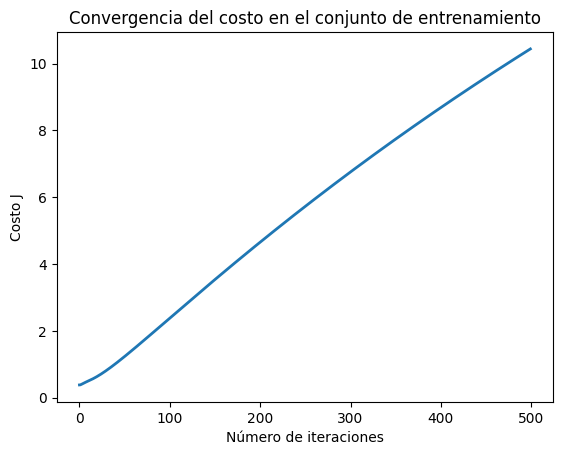

In [24]:
# Configurar hiperparámetros y realizar descenso por el gradiente en el conjunto de entrenamiento
alpha = 0.25
num_iters = 500       #con 500 iteraciones ya tenemos una buena convergencia
lambda_= 0.1
theta = np.zeros(18)
theta, J_history = descensoGradiente(theta, X_train, y_train, alpha, num_iters, lambda_)

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: \n',(theta))


# Graficar la convergencia del costo en el conjunto de entrenamiento
pyplot.plot(np.arange(len(J_history)), (J_history), lw=2)

pyplot.xlabel('Número de iteraciones')
pyplot.ylabel('Costo J')
pyplot.title('Convergencia del costo en el conjunto de entrenamiento')
pyplot.show()



In [25]:
#Revisamos las dimensiones de X_normalizada
print(X_norm.shape)

(100000, 18)


In [26]:
#Revisamos las dimensiones de Theta
tita = pd.DataFrame(theta)
print(tita.shape)

(18, 1)


Y por ultimo Hacemos las predicciones con el otro 20% de datos faltantes para la evaluacion del Modelo

In [27]:
# Realizar predicciones en el conjunto de prueba
y_predicha = calcularSigmoide(np.dot(X_test, theta))

# Calcular la precisión utilizando la función calcularPrecision
precision_test = calcularPrecision(y_predicha, y_test)

# Contar el número total de predicciones correctas
total_correct_predictions = np.sum((y_predicha >= 0.5).astype(int) == y_test)
total_incorrect_predictions = np.sum((y_predicha < 0.5).astype(int) == y_test)

# Imprimir resultados de las pruebas en el conjunto de prueba
print('Resultados en el conjunto de prueba:')
print(f'Número total de predicciones correctas: {total_correct_predictions}')
print(f'Número total de predicciones incorrectas: {total_incorrect_predictions}')
print(f'Porcentaje de precisión: {precision_test:.2%}')


Resultados en el conjunto de prueba:
Número total de predicciones correctas: 18777
Número total de predicciones incorrectas: 1223
Porcentaje de precisión: 93.88%
